In [11]:
# I wanted to compare these against calories burned; most promising predictors
#1 - VeryActiveMinutes vs. VeryActiveDistance
#2 - TotalDistance vs. TotalSteps
#3 - FairlyActiveMinutes vs. ModeratelyActiveDistance

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
dataset = pd.read_csv("/Users/aimeexu/Desktop/dataset.csv")
print("Data Successfully Imported")

Data Successfully Imported


In [146]:
dataset.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/16,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/16,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/16,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/16,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/16,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
data.describe()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.940000e+02,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,4.782378e+09,8030.912752,5.772170,0.113737,1.580000,0.596745,3.512718,0.001689,22.253915,14.262864,202.733781,969.605145,2334.772931
std,2.434238e+09,4904.332852,3.816237,0.635163,2.704044,0.896373,1.942749,0.007524,33.317996,20.251145,102.564675,289.746307,714.929899
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,4505.250000,3.085000,0.000000,0.000000,0.000000,2.202500,0.000000,0.000000,0.000000,140.000000,725.250000,1849.250000
50%,4.445115e+09,7818.500000,5.440000,0.000000,0.340000,0.275000,3.510000,0.000000,6.000000,8.000000,205.000000,1038.500000,2187.500000
75%,6.962181e+09,10977.500000,7.800000,0.000000,2.197500,0.830000,4.877500,0.000000,34.000000,20.000000,269.750000,1201.000000,2809.750000
max,8.877689e+09,36019.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [16]:
# DEFINING X & Y Variables
#X = dataset.iloc[:,:-1].values
#Y = dataset.iloc[:,-1].values

In [46]:
# SPLITTING DATA INTO TRAINING AND TESTING SETS 
#I set the test_size=0.2 to tell it to split 80% of data into TRAIN DATA & 20% into TEST DATA. 
train, test = train_test_split(data, test_size=0.2, random_state=1)
print("Shape of full dataset is: {0}".format(data.shape))
print("Shape of training dataset is: {0}".format(train.shape))
print("Shape of test dataset is: {0}".format(test.shape))

Shape of full dataset is: (894, 14)
Shape of training dataset is: (715, 14)
Shape of test dataset is: (179, 14)


In [67]:
# CONDITION 1: VERY ACTIVE MINUTES & VERY ACTIVE DISTANCE
X_train1 = train[['VeryActiveMinutes', 'VeryActiveDistance']]
Y_train1 = train['Calories']

X_test1 = test[['VeryActiveMinutes', 'VeryActiveDistance']]
Y_test1 = test['Calories']

In [47]:
# TRAINING MODEL
regression = LinearRegression()
regressor.fit(X_train1, Y_train1)

LinearRegression()

In [108]:
# PREDICTING ON TEST SET
Y_pred1 = regressor.predict(X_test1)
np.set_printoptions(precision=2)
# print(np.concatenate((Y_pred1.reshape(len(Y_pred1),1),Y_test.reshape(len(Y_pred1),1)),1))

In [137]:
# PRINTING COEFFICIENT and INTERCEPT VALUES
print('Coefficients:', regressor.coef_)
print('Intercepts:', regressor.intercept_)

Coefficients: [  30.27 -501.59]
Intercepts: 2210.2749489924545


In [107]:
# ERROR CALCULATION
r2_test = regressor.score(X_test1, Y_test1)
r2_train = regressor.score(X_train1, Y_train1)
mse_test = mean_squared_error(Y_pred1, Y_test1)
mse_train = mean_squared_error(Y_train1, regressor.predict(X_train1))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 2.3906e+08
MSE of train data = 2.6826e+05
R^2 of Test = -557.92
R^2 of Train = 0.495


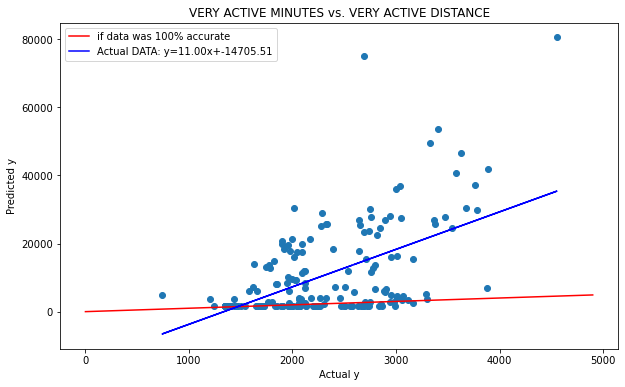

In [109]:
# PLOTTING the Y versus the Predicted Y
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_title("VERY ACTIVE MINUTES vs. VERY ACTIVE DISTANCE")
ax.plot(Y_test1, Y_pred1, 'o')
grid0 = np.linspace(np.min(dataset.Calories), np.max(dataset.Calories), 100)
ax.plot(grid0, grid0, color ='red', label = "if data was 100% accurate")
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")

# LINE OF BEST FIT
m, b = np.polyfit(Y_test1, Y_pred1, 1)
ax.plot(Y_test1, m*Y_test1 + b, color = 'blue', label = f'Actual DATA: y={m:.2f}x+{b:.2f}')
        
ax.legend() 

In [103]:
# CONDITION 2: TotalDistance vs. TotalSteps
X_train2 = train[['TotalDistance', 'TotalSteps']]
Y_train2 = train['Calories']

X_test2 = test[['TotalDistance', 'TotalSteps']]
Y_test2 = test['Calories']

In [104]:
# TRAINING the MODEL
regression = LinearRegression()
regressor.fit(X_train2, Y_train2)

LinearRegression()

In [112]:
# PREDICTING ON TEST SET
Y_pred2 = regressor.predict(X_test2)
np.set_printoptions(precision=2)

In [113]:
# PRINTING COEFFICIENT and INTERCEPT VALUES
print('Coefficients:', regressor.coef_)
print('Intercepts:', regressor.intercept_)

Coefficients: [ 3.94e+02 -2.14e-01]
Intercepts: 1780.995040338156


In [114]:
# ERROR CALCULATION
r2_test = regressor.score(X_test2, Y_test2)
r2_train = regressor.score(X_train2, Y_train2)
mse_test = mean_squared_error(Y_pred, Y_test2)
mse_train = mean_squared_error(Y_train2, regressor.predict(X_train2))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 2.3906e+08
MSE of train data = 2.6826e+05
R^2 of Test = 0.36712
R^2 of Train = 0.495


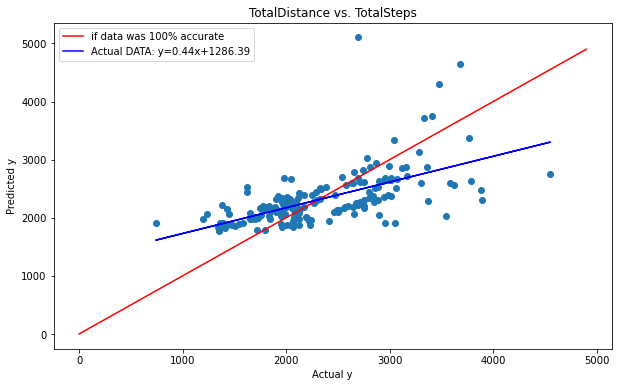

In [121]:
# PLOTTING the Y versus the Predicted Y
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_title("TotalDistance vs. TotalSteps")
ax.plot(Y_test2, Y_pred2, 'o')
grid0 = np.linspace(np.min(dataset.Calories), np.max(dataset.Calories), 100)
ax.plot(grid0, grid0, color ='red', label = "if data was 100% accurate")
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")

# LINE OF BEST FIT
m, b = np.polyfit(Y_test2, Y_pred2, 1)
ax.plot(Y_test2, m*Y_test2 + b, color = 'blue', label = f'Actual DATA: y={m:.2f}x+{b:.2f}')
        
ax.legend() 

In [122]:
# CONDITION 3: FairlyActiveMinutes vs. ModeratelyActiveDistance
X_train3 = train[['FairlyActiveMinutes', 'ModeratelyActiveDistance']]
Y_train3 = train['Calories']

X_test3 = test[['FairlyActiveMinutes', 'ModeratelyActiveDistance']]
Y_test3 = test['Calories']

In [127]:
# TRAINING the MODEL
regression = LinearRegression()
regressor.fit(X_train3, Y_train3)

LinearRegression()

In [128]:
# PREDICTING ON TEST SET
Y_pred3 = regressor.predict(X_test3)
np.set_printoptions(precision=2)

In [135]:
# PRINTING COEFFICIENT and INTERCEPT VALUES
print('Coefficients:', regressor.coef_)
print('Intercepts:', regressor.intercept_)

# ERROR CALCULATION
r2_test = regressor.score(X_test3, Y_test3)
r2_train = regressor.score(X_train3, Y_train3)
mse_test = mean_squared_error(Y_pred3, Y_test3)
mse_train = mean_squared_error(Y_train3, regressor.predict(X_train3))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

Coefficients: [  30.27 -501.59]
Intercepts: 2210.2749489924545
MSE of test data = 3.4589e+05
MSE of train data = 4.7444e+05
R^2 of Test = 0.1913
R^2 of Train = 0.10687


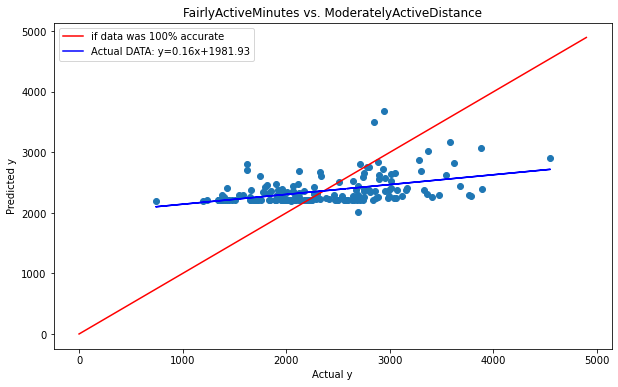

In [134]:
# PLOTTING the Y versus the Predicted Y
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_title("FairlyActiveMinutes vs. ModeratelyActiveDistance")
ax.plot(Y_test3, Y_pred3, 'o')
grid0 = np.linspace(np.min(dataset.Calories), np.max(dataset.Calories), 100)
ax.plot(grid0, grid0, color ='red', label = "if data was 100% accurate")
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")

# LINE OF BEST FIT
m, b = np.polyfit(Y_test3, Y_pred3, 1)
ax.plot(Y_test3, m*Y_test3 + b, color = 'blue', label = f'Actual DATA: y={m:.2f}x+{b:.2f}')
        
ax.legend() 

In [200]:
# BUILDING LINEAR REGRESSION PREDICTION MODEL
#1 - VeryActiveMinutes vs VeryActive Distance
reg1 = linear_model.LinearRegression()
data1 = dataset.drop(['Id','ActivityDate', 'TotalDistance','LoggedActivitiesDistance' ,'TotalSteps', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'], axis=1)
data1.head()
group1 = ['VeryActiveMinutes', 'VeryActiveDistance']
reg1.fit(data1[group1], data1['Calories'])

LinearRegression()

In [206]:
# Now We have a model that can predict how many calories will be burned based on How many "VeryActiveMinutes" and "VeryActiveDistance"!
reg1.predict([[100,100]])

array([1931.61])